### Packages

In [ ]:
using DataFrames,CairoMakie,Random,LinearAlgebra
using StatsBase,LinearAlgebra, Interpolations,Distributions
using Dates


In [36]:
dir = "/Users/jbusink/Documents/GitHub/Neutronenbron_Simulatie/"
include(dir * "Scripts/Simulation.jl")
include(dir * "Scripts/Neutron_functions.jl")
include("/Users/jbusink/Documents/GitHub/Julia Projects/FFT/NDiff/src/light_theme.jl")

using .SM, .NF

## Cross sections data
data from https://wwwndc.jaea.go.jp/ENDF_Graph/

In [ ]:

x = NF.logrange(-5,10,101)

fig = Figure(resolution=(800,400))

ax = Axis(fig[1, 1], 
xlabel = L"E (eV)", ylabel = L"\sigma (m^2)",
limits =(1e-3, 1e7,1e-28,1e-25), 
yscale=log10,xscale=log10
# xticks = 0:2:10,yticks=0.:0.2:0.6,
)

lines!(x, NF.cross_section_H1_SI.(x); linewidth = 4, label = L"\sigma_n(h1)")
axislegend(position = :rt, bgcolor = (:grey90, 0.55))

ax = Axis(fig[1,2],
xlabel = L"d (m)",ylabel=L"P(d)",
limits = (0.0001,1e0,0.0001,4e2),
yscale=log10,
# xscale=log10,
)
lines!(x,(1 ./ NF.MFP(NF.n_protons,NF.cross_section_H1_SI(1e7))) .* exp.(-1 .* x ./ NF.MFP(NF.n_protons,NF.cross_section_H1_SI(1e7)) ),label = L"10MeV",linewidth=3)
lines!(x,(1 ./ NF.MFP(NF.n_protons,NF.cross_section_H1_SI(1e6))) .* exp.(-1 .* x ./ NF.MFP(NF.n_protons,NF.cross_section_H1_SI(1e6)) ),label = L"1MeV",linewidth=3)
lines!(x,(1 ./ NF.MFP(NF.n_protons,NF.cross_section_H1_SI(1e5))) .* exp.(-1 .* x ./ NF.MFP(NF.n_protons,NF.cross_section_H1_SI(1e5)) ),label = L"100keV",linewidth=3)

lines!(x,(1 ./ NF.MFP(NF.n_protons,NF.cross_section_H1_SI(1e4))) .* exp.(-1 .* x ./ NF.MFP(NF.n_protons,NF.cross_section_H1_SI(1e4)) ),label = L"10keV")
lines!(x,(1 ./ NF.MFP(NF.n_protons,NF.cross_section_H1_SI(1e3))) .* exp.(-1 .* x ./ NF.MFP(NF.n_protons,NF.cross_section_H1_SI(1e3)) ),label = L"1keV")
lines!(x,(1 ./ NF.MFP(NF.n_protons,NF.cross_section_H1_SI(1e2))) .* exp.(-1 .* x ./ NF.MFP(NF.n_protons,NF.cross_section_H1_SI(1e2)) ),label = L"100eV",linewidth=3)

axislegend(position = :rt, bgcolor = (:grey90, 0.55));

# fig



In [ ]:
df_H1nn = NF.read_cross_section_data(dir*"Data/H1_elastic_scattering_sigma.rtf")
df_H1ngamma = NF.read_cross_section_data(dir*"Data/H1_fission_sigma.rtf")
df_O16nn = NF.read_cross_section_data(dir*"Data/O16_elastic_scattering_sigma.rtf")
df_O16ngamma = NF.read_cross_section_data(dir*"Data/O16_fission_sigma.rtf")

H1MFP(E) = 1000 .* NF.MFP(NF.n_protons,NF.cross_section_interpolated(dir*"Data/H1_elastic_scattering_sigma.rtf",E) ./ 1e28)
H1(x,E) = (1 ./ H1MFP(E)) .* exp.(-1 .* x ./ H1MFP(E))

H1γMFP(E) = 1000 .* NF.MFP(NF.n_protons,NF.cross_section_interpolated(dir*"Data/H1_fission_sigma.rtf",E) ./ 1e28)
H1γ(x,E) = (1 ./ H1γMFP(E)) .* exp.(-1 .* x ./ H1γMFP(E))

O16MFP(E) = 1000 .* NF.MFP(NF.n_oxygen,NF.cross_section_interpolated(dir*"Data/O16_elastic_scattering_sigma.rtf",E) ./ 1e28)
O16(x,E) = (1 ./ O16MFP(E)) .* exp.(-1 .* x ./ O16MFP(E))

O16γMFP(E) = 1000 .* NF.MFP(NF.n_oxygen,NF.cross_section_interpolated(dir*"Data/O16_fission_sigma.rtf",E) ./ 1e28)
O16γ(x,E) = (1 ./ O16γMFP(E)) .* exp.(-1 .* x ./ O16γMFP(E))


In [ ]:
fig = Figure(resolution=(1000,800))
axes =Axis(fig[1,1],
yscale = log10,xscale=log10,
xlabel = L"Energy (eV)", ylabel = L"\sigma_{n,n/\gamma}(b)",
xlabelsize=22,ylabelsize=22,
title= L"\sigma",titlesize=20,
limits=(1e-5,1e7,1e-8,1e3)
)

lines!(df_H1nn.Energy_ev,df_H1nn.cross_section_b,label = L"H1(nn)",linewidth=3)
lines!(df_H1ngamma.Energy_ev,df_H1ngamma.cross_section_b,label = L"H1(n\gamma)",linewidth=3)
lines!(df_O16nn.Energy_ev,df_O16nn.cross_section_b,label = L"O16(nn)",linewidth=3)
lines!(df_O16ngamma.Energy_ev,df_O16ngamma.cross_section_b,label = L"O16(n\gamma)",linewidth=3)
lines!(x, NF.cross_section_H1_SI.(x) .* 1e28; linewidth = 2, label = L"\sigma(E)",color=:black,linestyle=:dash)

axislegend(position = :lb, bgcolor = (:grey90, 0.55));


axes =Axis(fig[2,1],
yscale = log10,xscale=log10,
xlabel = L"Energy (eV)", ylabel = L"\lambda_{MFP} (mm)",
xlabelsize=22,ylabelsize=22,
title= L"MFP",titlesize=20,
limits=(1e-5,1e7,1e-2,1e10)
)

lines!(df_H1nn.Energy_ev,1000 ./ (df_H1nn.cross_section_b .* 2 .* NF.n_protons ./ 1e28),label = L"H1(nn)",linewidth=3)
lines!(df_H1ngamma.Energy_ev,1000 ./ (df_H1ngamma.cross_section_b .* 2 .* NF.n_protons ./ 1e28),label = L"H1(n\gamma)",linewidth=3)
lines!(df_O16nn.Energy_ev, 1000 ./ (df_O16nn.cross_section_b .* 1 .* NF.n_protons ./ 1e28),label = L"O16(nn)",linewidth=3)
lines!(df_O16ngamma.Energy_ev, 1000 ./ (df_O16ngamma.cross_section_b .* 1 .* NF.n_protons ./ 1e28),label = L"O16(n\gamma)",linewidth=3)
axislegend(position = :lt, bgcolor = (:grey90, 0.55));


ax = Axis(fig[1,2],
xlabel = L"d (mm)",ylabel=L"P(d)",
limits = (1e-1,1e4,1e-4,1e0),
yscale=log10,xscale=log10,
title= L"H1(nn)",titlesize=20
# xscale=log10,
)
lines!(x,H1(x,1e7),label = L"10MeV",linewidth=3)
lines!(x,H1(x,1e6),label = L"1MeV",linewidth=3)
# lines!(x,(1 ./ (1000 .* NF.MFP(NF.n_protons,NF.cross_section_H1_SI(1e6))) ).* exp.(-1 .* x ./ (1000 .* NF.MFP(NF.n_protons,NF.cross_section_H1_SI(1e6))) ),label = L"10MeV",linewidth=1)
lines!(x,H1(x,1e5),label = L"100keV",linewidth=3)
lines!(x,H1(x,1e3),label = L"1keV",linewidth=3)
lines!(x,H1(x,1e-2),label = L"10omeV",linewidth=3)
axislegend(position = :rt, bgcolor = (:grey90, 0.55));

ax = Axis(fig[1,3],
xlabel = L"d (mm)",ylabel=L"P(d)",
limits = (1e-1,1e4,1e-4,1e-1),
yscale=log10,xscale = log10,
title= L"O16(nn)",titlesize=20
)

lines!(x,O16(x,10e6),label = L"10MeV",linewidth=3)
lines!(x,O16(x,1e6),label = L"1MeV (resonance)",linewidth=3)
lines!(x,O16(x,1e5),label = L"100keV",linewidth=3)
lines!(x,O16(x,1e3),label = L"1keV",linewidth=3)
lines!(x,O16(x,1e-2),label = L"100meV",linewidth=3)

axislegend(position = :rt, bgcolor = (:grey90, 0.55));


ax = Axis(fig[2,2],
xlabel = L"d (mm)",ylabel=L"P(d)",
limits = (1e-0,1e9,1e-8,1e-2),
yscale=log10,xscale = log10,
title= L"H1($\gamma$n)",titlesize=20
)

lines!(x,H1γ(x,10e6),label = L"10MeV",linewidth=3)
lines!(x,H1γ(x,1e6),label = L"1MeV",linewidth=3)
lines!(x,H1γ(x,1e5),label = L"100keV",linewidth=3)
lines!(x,H1γ(x,1e3),label = L"1keV",linewidth=3)
lines!(x,H1γ(x,1e-2),label = L"100meV",linewidth=3)

axislegend(position = :rt, bgcolor = (:grey90, 0.55));


axislegend(position = :rt, bgcolor = (:grey90, 0.55));
ax = Axis(fig[2,3],
xlabel = L"d (mm)",ylabel=L"P(d)",
limits = (1e-0,1e9,1e-10,1e-5),
yscale=log10,xscale = log10,
title= L"O16($\gamma$n)",titlesize=20
)

lines!(x,O16γ(x,10e6),label = L"10MeV",linewidth=3)
lines!(x,O16γ(x,1e6),label = L"1MeV",linewidth=3)
lines!(x,O16γ(x,1e5),label = L"100keV",linewidth=3)
lines!(x,O16γ(x,1e3),label = L"1keV",linewidth=3)
lines!(x,O16γ(x,1e-2),label = L"100meV",linewidth=3)

axislegend(position = :lb, bgcolor = (:grey90, 0.55));


# fig

## Single Collision Random Direction

In [ ]:
Etotal = []
E0=1e6
Px,Py,Pz = Vector{Float64}(),Vector{Float64}(),Vector{Float64}()

for i in 1:1:100000
    E0,θ,ϕ =1e6,rand()*π,rand()*2*π
    P_initial = sqrt.(2 .* E0) .* SM.unit_vector(θ,ϕ)
    # P_initial = sqrt.(2 .* E0) .* Array([0,0,1])
    P_initial,E = SM.single_collision_random(P_initial,E0)

    push!(Etotal,E)        
    append!(Px,P_initial[1])
    append!(Py,P_initial[2])
    append!(Pz,P_initial[3])
end

fig = Figure(resolution=(900, 600))
ax1 = Axis(fig[1, 1:6],
)
ax2 = Axis(fig[2:6, 1:6],
ylabel = L"p_y eV^{1/2}", xlabel = L"p_x eV^{1/2}",
limits =(-sqrt.(2 .* E0),sqrt.(2 .* E0),-sqrt.(2 .* E0),sqrt.(2 .* E0)), 
)
ax3 = Axis(fig[2:6, 7],
)
ax4 = Axis(fig[1:6, 8:12], 
ylabel = L"P(E_n/E_{n,0})", xlabel = L"E_n/E_{n,0}",
limits =(0,1,0,6), 
)

hist!(ax1, Px; bins=101,color=(:orange, 0.5), strokewidth=0.5)
scatter!(ax2, Px, Py;markersize=3,strokewidth=0.5,strokecolor=:black,color =:gray)
hist!(ax3, Py; bins=101,direction=:x, color=(:dodgerblue, 0.5),strokewidth=0.5)

hideydecorations!(ax3, ticks=false, grid=false)
hidexdecorations!(ax3, ticks=false, grid=false)
hideydecorations!(ax1, ticks=false, grid=false)
hidexdecorations!(ax1, ticks=false, grid=false)
colgap!(fig.layout, 10)
rowgap!(fig.layout, 10);
x = LinRange(0,1,1001)
α=0.5
hist!(ax4,Etotal./E0;bins = 201,strokecolor =:black,strokewidth=0.3,normalization = :pdf)
# lines!(ax4,x,(1/π)./(sqrt.(x .* (1 .- x))),color=:black,linewidth=3,Label = L"Arcsine")
lines!(ax4,x,(1 / π) .* ((x .^ (- α) .* ((1 .- x ) .^ (-α )))) ,color=:black,linewidth=3,Label = L"Arcsine")

# fig

# save("Single_collision_statistics.svg",fig)


In [ ]:


Elist = NF.logrange(-5,7,1001)
fig = Figure(resolution=(500,500))
ax = Axis(fig[1,1],
limits = (1e-5,1e6,0.98,1.005),
xscale=log10,
xlabel = L"Energy (eV)", ylabel = L"f_{survival}"
)
σHnn,σHnγ=NF.cross_section_interpolated(dir*"Data/H1_elastic_scattering_sigma.rtf", E),NF.cross_section_interpolated(dir*"Data/H1_fission_sigma.rtf", E)
σtotal = σHnn+σHnγ
lines!(Elist,NF.cross_section_interpolated(dir*"Data/H1_elastic_scattering_sigma.rtf", Elist) ./
( NF.cross_section_interpolated(dir*"Data/H1_elastic_scattering_sigma.rtf", Elist) .+ NF.cross_section_interpolated(dir*"Data/H1_fission_sigma.rtf", Elist)), label = L"$σH1nn/σ_{total}$" )
lines!(Elist,(2 .* NF.cross_section_interpolated(dir*"Data/H1_elastic_scattering_sigma.rtf", Elist) .+ NF.cross_section_interpolated(dir*"Data/O16_elastic_scattering_sigma.rtf",Elist)) ./
(2 .* NF.cross_section_interpolated(dir*"Data/H1_elastic_scattering_sigma.rtf", Elist) .+ 2 .* NF.cross_section_interpolated(dir*"Data/H1_fission_sigma.rtf", Elist) 
.+ NF.cross_section_interpolated(dir*"Data/O16_elastic_scattering_sigma.rtf",Elist) .+ NF.cross_section_interpolated(dir*"Data/O16_fission_sigma.rtf",Elist)), label = L"$(σH1nn+σO16nn)/σ_{total}$" )
axislegend(position = :lt, bgcolor = (:grey90, 0.55));

fig

## Multiple Collision Random Direction

In [367]:
Etotal = []
Pxtotal,Pytotal,Pztotal = [],[],[]
Xtotal,Ytotal,Ztotal = [],[],[]
for i in 1:1:100000
    if i % 20000 == 0
        println(i)
        println("Free momory: ", Sys.free_memory() / 2^30)
        println("Local Time: ",Dates.format(now(), "HH:MM:SS"))
    end
    E0,θ,ϕ =(rand()*4 .+ 3).*1e6,rand()*π,rand()*2*π
    P_initial = sqrt.(2 .* E0) .* SM.unit_vector(θ,ϕ)
    E,Px,Py,Pz = SM.multiple_collision_random(P_initial,E0,500,1)
    
    # distance =  NF.random_distance_trav.(E) .* 100
    normlist = [norm(permutedims(Array([Px Py Pz]))[1:3,i]) for i in 1:1:length(Pz)] .+ 1e-20
    Δx =  Px .* NF.random_distance_trav.(E) .* 100 ./ normlist
    Δy =  Py .* NF.random_distance_trav.(E) .* 100 ./ normlist
    Δz =  Pz .* NF.random_distance_trav.(E) .* 100 ./ normlist
    x,y,z = cumsum(Δx), cumsum(Δy), cumsum(Δz)

    push!(Etotal,E);push!(Pxtotal,Px);push!(Pytotal,Py);push!(Pztotal,Pz);
    push!(Xtotal,x);push!(Ytotal,y);push!(Ztotal,z)
end


20000
Free momory: 0.0344390869140625
Local Time: 23:18:39


40000
Free momory: 0.053436279296875
Local Time: 23:20:07


60000
Free momory: 0.045562744140625
Local Time: 23:22:01


80000
Free momory: 0.0604248046875
Local Time: 23:24:01


100000
Free momory: 0.0400238037109375
Local Time: 23:26:13


In [369]:
dict_energy=Dict()
dict_x,dict_y,dict_z = Dict(),Dict(),Dict()
dict_px,dict_py,dict_pz = Dict(),Dict(),Dict()

for k in 1:1:501
    dict_energy[k] = [Etotal[i][k] for i in 1:1:length(Etotal)]
    dict_x[k] = [Xtotal[i][k] for i in 1:1:length(Xtotal)]
    dict_y[k] = [Ytotal[i][k] for i in 1:1:length(Ytotal)]
    dict_z[k] = [Ztotal[i][k] for i in 1:1:length(Ztotal)]
    dict_px[k] = [Pxtotal[i][k] for i in 1:1:length(Pxtotal)]
    dict_py[k] = [Pytotal[i][k] for i in 1:1:length(Pytotal)]
    dict_pz[k] = [Pztotal[i][k] for i in 1:1:length(Pztotal)]
end

In [397]:
fig = Figure(resolution=(800,400))
ax = Axis(fig[1,1],
xlabel = L"$ρ (cm)$",ylabel = L"P(ρ)",
limits = (1e-1,100,0,0.1),
xscale = log10,
)
hist!(sqrt.(dict_x[1].^2 .+ dict_y[1].^2 .+ dict_z[1].^2),bins = NF.logrange(-2,2,201),normalization=:pdf)
hist!(sqrt.(dict_x[2].^2 .+ dict_y[2].^2 .+ dict_z[2].^2),bins = NF.logrange(-2,2,201),normalization=:pdf)
hist!(sqrt.(dict_x[3].^2 .+ dict_y[3].^2 .+ dict_z[3].^2),bins = NF.logrange(-2,2,201),normalization=:pdf)
hist!(sqrt.(dict_x[4].^2 .+ dict_y[4].^2 .+ dict_z[4].^2),bins = NF.logrange(-2,2,201),normalization=:pdf)
hist!(sqrt.(dict_x[5].^2 .+ dict_y[5].^2 .+ dict_z[5].^2),bins = NF.logrange(-2,2,201),normalization=:pdf)
hist!(sqrt.(dict_x[101].^2 .+ dict_y[101].^2 .+ dict_z[101].^2),bins = NF.logrange(-2,2,201),normalization=:pdf)
hist!(sqrt.(dict_x[501].^2 .+ dict_y[501].^2 .+ dict_z[501].^2),bins = NF.logrange(-2,2,201),normalization=:pdf)

ax = Axis(fig[1,2],
xlabel = L"$r (cm)$",ylabel = L"P(r)",
limits = (1e-2,100,0,0.2),
xscale = log10,
)
hist!(sqrt.(dict_x[1].^2 .+ dict_y[1].^2 ),bins = NF.logrange(-2,2,101),normalization=:pdf)
hist!(sqrt.(dict_x[2].^2 .+ dict_y[2].^2 ),bins = NF.logrange(-2,2,101),normalization=:pdf)
hist!(sqrt.(dict_x[3].^2 .+ dict_y[3].^2 ),bins = NF.logrange(-2,2,101),normalization=:pdf)
hist!(sqrt.(dict_x[4].^2 .+ dict_y[4].^2 ),bins = NF.logrange(-2,2,101),normalization=:pdf)
hist!(sqrt.(dict_x[5].^2 .+ dict_y[5].^2 ),bins = NF.logrange(-2,2,101),normalization=:pdf)
hist!(sqrt.(dict_x[101].^2 .+ dict_y[101].^2 ),bins = NF.logrange(-2,2,101),normalization=:pdf)
hist!(sqrt.(dict_x[501].^2 .+ dict_y[501].^2 ),bins = NF.logrange(-2,2,101),normalization=:pdf)


fig
r = sqrt.(dict_x[501].^2 .+ dict_y[501].^2 )
println(maximum(r))

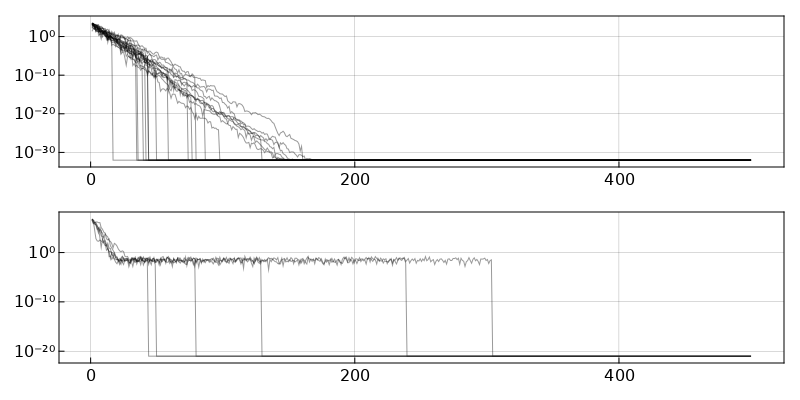

In [492]:
fig = Figure(resolution=(800,400))
ax = Axis(fig[1,1],
# xlabel = L"$ρ (cm)$",ylabel = L"P(ρ)",
# limits = (1e-1,100,0,0.1),
yscale = log10,
)
# for i in 1:1:500
# [lines!(LinRange(1,500,501),sqrt.(Xtotal[i].^2 .+ Ytotal[i].^2 .+ Ztotal[i].^2), color = (:black,0.4),linewidth =1) for i in 30:1:35]
[lines!(LinRange(1,500,501),abs.(Pxtotal[i]) .+ 1e-32, color = (:black,0.4),linewidth =1) for i in 30:1:50]

ax = Axis(fig[2,1],
# xlabel = L"$ρ (cm)$",ylabel = L"P(ρ)",
# limits = (1e-1,100,0,0.1),
yscale = log10,
)
[lines!(LinRange(1,500,501),Etotal[i] .+ 1e-21, color = (:black,0.4),linewidth =1) for i in 30:1:35]

fig

In [478]:
dissipated = [Etotal[i][100] for i in 1:1:length(Etotal)]

# length(dissipated[dissipated .> 0]) / length(dissipated)

# Xtotal[22][110:150]

λ0 = NF.MFP(NF.n_protons, NF.cross_section_H1_SI(1e-3))*100


0.11842729214173861

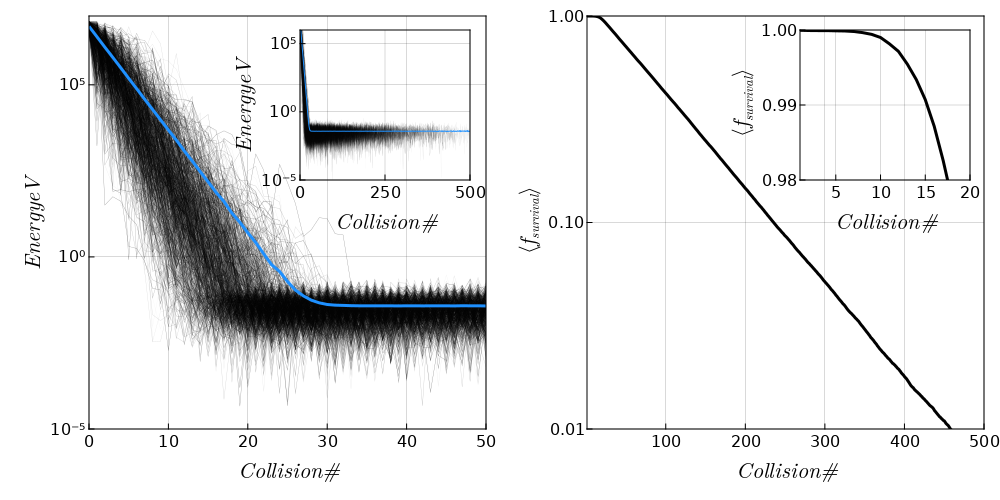

In [21]:


survival_fraction = [length(dict[i][dict[i] .!= 0])/length(dict[i]) for i in 1:1:501]
mean_energy = [mean(dict[i][dict[i] .!= 0]) for i in 1:1:501]

fig = Figure(resolution = (1000,500))
ax = Axis(fig[1,1],
xlabel=L"Collision #",ylabel = L"Energy eV",

limits=(0,50,1e-5,1e7),
yscale = log10)
for i in 1:1:1000
    lines!(LinRange(0,500,501), Etotal[i],color=(:black,0.5*rand()),linewidth=0.3)
end
lines!(LinRange(0,500,501),mean_energy,color=:dodgerblue,linewidth=3)

ax = Axis(fig, bbox = BBox(300, 470, 320, 470),
xlabel=L"Collision #",ylabel = L"Energy eV",
xticks = [0,250,500],
limits=(0,500,1e-5,1e6),
yscale = log10)
for i in 1:1:500
    lines!(LinRange(0,500,501), Etotal[i],color=(:black,0.5*rand()),linewidth=0.1)
end
lines!(LinRange(0,500,501),mean_energy,color=:dodgerblue,linewidth=1)

ax = Axis(fig[1,2],
yscale=log10,
xlabel=L"Collision #",ylabel = L"$\langle$$f_{survival}$$\rangle$",
limits = (1,500,1e-2,1),
yticks = [0.01,0.1,1],zorder = -1)
lines!(range(0,500,501),survival_fraction,color=:black,linewidth = 3)

ax = Axis(fig, bbox = BBox(800, 970, 320, 470),backgroundcolor=(:white),
# yscale=log10,
xlabel=L"Collision #",ylabel = L"$\langle$$f_{survival}$$\rangle$",
limits = (1,20,0.98,1),
yticks = [0.98,0.99,1],)
lines!(range(0,500,501),survival_fraction,color=:black,linewidth = 3)

fig

# save("Energy_trajectories_survival_chance_500_collisions.pdf",fig)

In [ ]:
function save_data(df)

    println("Data saved at: ",location)
    return 
end

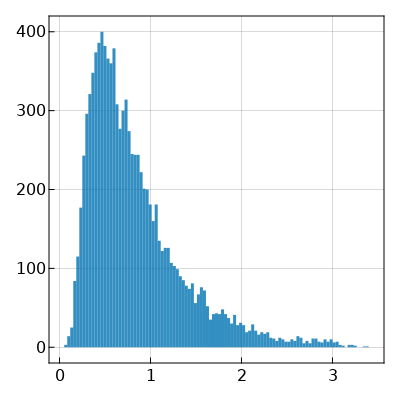

In [99]:
total_distance = [sum(NF.random_distance_trav.(Etotal[i])) for i in 1:1:10000]
fig = Figure(resolution = (400,400))
ax = Axis(fig[1,1],
)
hist!(total_distance,bins=101)
fig

In [27]:
#code works if particles are not removed
fig = Figure(resolution = (1000,600))
ax = Axis(fig[2:4,1],
xscale=log10,
limits=(1e-4,1e6,0,3e4),
xlabel = L"Energy (eV)", ylabel = L"P(E)",
)
hist!(dict[2],bins=NF.logrange(-6,6,101),label = L"N = 1")
# hist!(dict[3],bins=NF.logrange(-6,6,101),label = L"N = 2")
hist!(dict[6],bins=NF.logrange(-6,6,101),label = L"N = 5")
hist!(dict[11],bins=NF.logrange(-6,6,101),label = L"N = 10")
hist!(dict[16],bins=NF.logrange(-6,6,101),label = L"N = 15")
hist!(dict[21],bins=NF.logrange(-6,6,101),label = L"N = 20")
hist!(dict[31],bins=NF.logrange(-6,6,101),label = L"N = 30")
axislegend(L"# collisions",position = :lt, bgcolor = (:grey90, 0.55));

ax = Axis(fig[1,1],
xlabel = L"collision #", ylabel = L"$\langle$E$\rangle$",
yscale=log10,
limits=(1,50,1e-2,1e6)
)
mean_energy = [mean(dict[i]) for i in 1:1:51]
lines!(range(1,50,51),mean_energy)

ax = Axis(fig[2:4,2],
# xscale=log10,
limits=(0.985,1,0,2e4),
xlabel = L"f_{survival}", ylabel = L"P(f)",
)
hist!(survival_chance(dict[2]),bins=101,label = L"N = 1")
# hist!(survival_chance(dict[3]),bins=101,label = L"N = 2")
hist!(survival_chance(dict[6]),bins=101,label = L"N = 5")
hist!(survival_chance(dict[11]),bins=101,label = L"N = 10")
hist!(survival_chance(dict[16]),bins=101,label = L"N = 15")
hist!(survival_chance(dict[21]),bins=101,label = L"N = 20")
hist!(survival_chance(dict[31]),bins=101,label = L"N = 30")
axislegend(L"# collisions",position = :lt, bgcolor = (:grey90, 0.55));

ax = Axis(fig[1,2],
xlabel = L"collision #", ylabel = L"$\langle$f$\rangle$",
limits=(1,50,0.985,1.005)
)
mean_survival_chance = [mean(survival_chance(dict[i])) for i in 1:1:51]
lines!(range(1,50,51),mean_survival_chance)
# åfig 

# save("survival_change_energy_1e6collisions.pdf",fig)

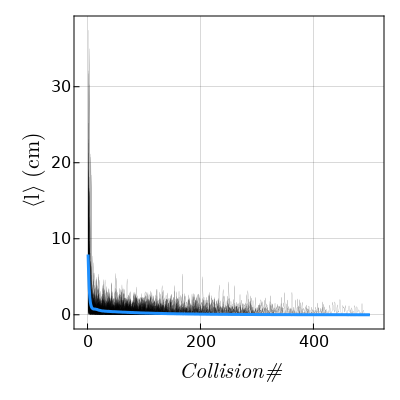

In [86]:
# Etotal[1]
# NF.random_distance_trav(0)
# distancelist = [NF.random_distance_trav.(Etotal[i]) for i in 1:1:2000]
# distancelist = vcat(distancelist...)

# meanL = mean([NF.random_distance_trav.(Etotal[i][1:1:500]) for i in 1:1:10000])
# yerr = std([NF.random_distance_trav.(Etotal[i][1:1:500]) for i in 1:1:10000]) ./ sqrt.(length(Etotal))

fig = Figure(resolution = (400,400))
ax = Axis(fig[1,1],
xlabel = L"Collision #",ylabel = L"$\langle$l$\rangle$ (cm)",
# yscale = log10,
# limits = (-5,0,0,1000)
)
# for i in 1:1:100
#     lines!(NF.random_distance_trav.(Etotal[i][1:1:500]).*100,color = :black,linewidth= .1)
# end
# lines!(meanL*100,color = :dodgerblue,linewidth =3)

# hist!(log10.(distancelist .+ 1e-12),bins = 10001)

fig


In [ ]:
# distancelist = [NF.random_distance_trav.(Etotal[i]) for i in 1:1:length(Etotal)]
# distance_per_collision = hcat(distancelist...)

meanL = mean([NF.random_distance_trav.(Etotal[i][1:1:40]) for i in 1:1:length(Etotal)],dims = 2)


# meanL = mean([NF.random_distance_trav.(Etotal[i][1:1:40]) for i in 1:1:length(Etotal)])
# yerr = std([NF.random_distance_trav.(Etotal[i][1:1:40]) for i in 1:1:length(Etotal)]) ./ sqrt.(length(Etotal))

# fig = Figure(resolution=(500,500))
# ax = Axis(fig[1,1],
# # limits = (),
# xlabel = L"d (cm)",ylabel = L"P(d)",
# )
# hist!(distance_per_collision[1],bins=51)
# fig



In [ ]:
using Distributed,BenchmarkTools
# addprocs(2)

using SharedArrays
using DelimitedFiles

@everywhere begin 
    using DifferentialEquations

    tf(x,w) = x*sin(w*x)

    function sys!(dv,v,w,t)
        dv[1] = w*v[1]
        dv[2] = tf(v[1],w)
    end

    times = LinRange(0.1,2,25)
    params = LinRange(0.1,1.2,10000)
end

sols = SharedArray{Float64,2}((length(times),length(params)))

@time @sync @distributed for i=1:length(params)
    # println(i)
    init_val = [1.0,1.0]
    tspan = (0.0,2.0)
    prob = ODEProblem(sys!,init_val,tspan,params[i])
    sol = solve(prob)
    sols[:,i] .= sol(times)[2,:]
end

# sols

In [339]:
E0,θ,ϕ =1e6,rand()*π,rand()*2*π
P_initial = sqrt.(2 .* E0) .* SM.unit_vector(θ,ϕ)
E,Px,Py,Pz = SM.multiple_collision_random(P_initial,E0,500,1)

distance =  NF.random_distance_trav.(E) .* 100
normlist = [norm(permutedims(Array([Px Py Pz]))[1:3,i]) for i in 1:1:length(Pz)] .+ 1e-20
Δx =  Px .* distance ./ normlist
Δy =  Py .* distance ./ normlist
Δz =  Pz .* distance ./ normlist
x,y,z = cumsum(Δx), cumsum(Δy), cumsum(Δz)


println(length(x),length(E),length(Px))
# pvector = Array([Px,Py,Pz])
# rold = Array([0.1,0.1,0.2])
# position(pvector,rold,E)

# println(Px)
# println(pvector)

501501501


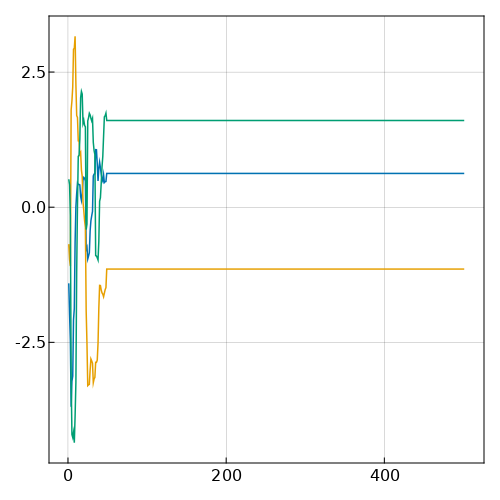

In [340]:

fig = Figure(resolution = (500,500))
ax  = Axis(fig[1,1])
lines!(cumsum(Δx))
lines!(cumsum(Δy))
lines!(cumsum(Δz))
# lines!(Px ./ normlist)
# lines!(Δz)
fig

# mean(Δx)

### Single Collision Momentum space

In [ ]:

fig = Figure(resolution = (800, 400))
ax1 = Axis(fig[1, 1], 
# ylabel = L"E_n/E_{n,0}", xlabel = L"Collision #",
# limits =(0, 20,1e-12,1), 
)

ax2 = Axis(fig[1, 2], 
# ylabel = L"E_n/E_{n,0}", xlabel = L"Collision #",
limits =(-0.025,0.025, -0.025,0.025), 
)

for i in 1:1:100
    E0,θ,ϕ =1e6,rand()*π,rand()*2*π
    P_initial = sqrt.(2 .* E0) .* SM.unit_vector(θ,ϕ)
    # P_initial = sqrt.(2 .* E0) .* Array([0,0,1])
    E,Px,Py,Pz,collision_number,thermalization_number = SM.multiple_collision_random(P_initial,E0,40,1)
    lines!(ax1,Px,Py,color=(:black,0.5),linewidth=2)
    # lines!(ax2,Px,Py,color=(:black,0.5),linewidth=2)

end

fig

In [ ]:
using Distributions
Nav = 6.023*10^23
MH20 = 18.01524
n_protons = (1e6*0.99820/MH20)*2*Nav #(= protons/m^3)
n_oxygen = (1e6*0.99820/MH20)*Nav #(= protons/m^3)

function MFP(n,Energy)
    sigma = cross_section_H1_SI.(Energy)
    return (1/(n .* sigma))
end

function MFP(Energy)
    n_protons = (1e6*0.99820/MH20)*2*Nav #(= protons/m^3)
    # println(MFP(n_protons,Energy))
    
    d = Exponential(MFP(n_protons,Energy))
    rng = rand(d)
    println(rng)
    return rng
end






# fig = Figure(resolution = (500,500))
# x = logrange(-2,6,101)
# ax = Axis(fig[1,1])
# lines!(x,MFP.(x))
# fig

pvector = [1,1,10]
rold = [1,2,3.]
Energy = 1e6

println(position(pvector,rold,Energy))


In [ ]:
using GLMakie
using FileIO
import AbstractPlotting as AP

GLMakie.activate!()
GLMakie.closeall()




f = Figure(resolution = (1200,800))



ax = Axis3(f[1, 1], aspect = (1,1,1),
protrusions = (50, 50, 50, 50),
xlabelsize=36, ylabelsize=36,zlabelsize=36,
ylabel = L"Py (eV)", xlabel = L"Px (eV)",zlabel = L"Pz (eV)",
limits =(-1500,1500,-1500,1500,-1500,1500), 
yticklabelsize=22,xticklabelsize=22,zticklabelsize=22,
xgridvisible=true, ygridvisible=true,zgridvisible =false,
xticks = -1200:600:1200,yticks = -1200:600:1200,zticks =-1200:600:1200,
perspectiveness = 0.3,title="Momentum of particles",titlesize=50,viewmode=:fit,
xlabeloffset=60,ylabeloffset=60

)

for i in 1:1:100
    E0,θ,ϕ =1e6,rand()*π,rand()*2*π
    P_initial = sqrt.(2 .* E0) .* unit_vector(θ,ϕ)
    # P_initial = sqrt.(2 .* E0) .* Array([0,0,1])
    E,Px,Py,Pz,collision_number,thermalization_number = multiple_collision_random(P_initial,E0,10)
    trans = rand()
    color = RGBf(rand(3)...)
    meshscatter!(Px,Py,Pz; markersize=log2.(E[end])*3,shading = true,transparacy = true,color=(:black,trans))
    lines!(Px,Py,Pz,color = (:black,trans),linewidth=log2.(E[end])/3.)

end

ax2 = Axis3(f[1, 2], aspect = (1,1,1),
protrusions = (50, 50, 50, 50),
xlabelsize=36, ylabelsize=36,zlabelsize=36,
ylabel = L"Py (eV)", xlabel = L"Px (eV)",zlabel = L"Pz (eV)",
limits =(-1500,1500,-1500,1500,-1500,1500), 
yticklabelsize=22,xticklabelsize=22,zticklabelsize=22,
xgridvisible=true, ygridvisible=true,zgridvisible =false,
xticks = -1200:600:1200,yticks = -1200:600:1200,zticks =-1200:600:1200,
perspectiveness = 0.3,title="Momentum of particles",titlesize=50,viewmode=:fit,
xlabeloffset=60,ylabeloffset=60

)
f


In [ ]:
E0_list,E1_list,E2_list,E3_list,E4_list,E5_list = Vector{Float64}(),Vector{Float64}(),Vector{Float64}(),Vector{Float64}(),Vector{Float64}(),Vector{Float64}()
E6_list,E7_list,E8_list,E9_list,E10_list,E11_list = Vector{Float64}(),Vector{Float64}(),Vector{Float64}(),Vector{Float64}(),Vector{Float64}(),Vector{Float64}()
E12_list,E13_list,E14_list,E15_list,E16_list,E17_list = Vector{Float64}(),Vector{Float64}(),Vector{Float64}(),Vector{Float64}(),Vector{Float64}(),Vector{Float64}()
E18_list,E19_list,E20_list,E21_list,E22_list,E23_list = Vector{Float64}(),Vector{Float64}(),Vector{Float64}(),Vector{Float64}(),Vector{Float64}(),Vector{Float64}()
E24_list,E25_list,E26_list,E27_list,E28_list,E29_list = Vector{Float64}(),Vector{Float64}(),Vector{Float64}(),Vector{Float64}(),Vector{Float64}(),Vector{Float64}()
E30_list,E35_list,E40_list = Vector{Float64}(),Vector{Float64}(),Vector{Float64}()
E45_list,E50_list,E60_list = Vector{Float64}(),Vector{Float64}(),Vector{Float64}()
E70_list,E80_list,E90_list = Vector{Float64}(),Vector{Float64}(),Vector{Float64}()
E100_list,E150_list,E200_list = Vector{Float64}(),Vector{Float64}(),Vector{Float64}()

for i in 1:1:100000
    push!(E0_list,Etotal[i][1])
    push!(E1_list,Etotal[i][2])
    push!(E2_list,Etotal[i][3])
    push!(E3_list,Etotal[i][4])
    push!(E4_list,Etotal[i][5])
    push!(E5_list,Etotal[i][6])
    push!(E6_list,Etotal[i][7])
    push!(E7_list,Etotal[i][8])
    push!(E8_list,Etotal[i][9])
    push!(E9_list,Etotal[i][10])
    push!(E10_list,Etotal[i][11])
    push!(E11_list,Etotal[i][12])
    push!(E12_list,Etotal[i][13])
    push!(E13_list,Etotal[i][14])
    push!(E14_list,Etotal[i][15])
    push!(E15_list,Etotal[i][16])
    push!(E16_list,Etotal[i][17])
    push!(E17_list,Etotal[i][18])
    push!(E18_list,Etotal[i][19])
    push!(E19_list,Etotal[i][20])
    push!(E20_list,Etotal[i][21])
    push!(E21_list,Etotal[i][22])
    push!(E22_list,Etotal[i][23])
    push!(E23_list,Etotal[i][24])
    push!(E24_list,Etotal[i][25])
    push!(E25_list,Etotal[i][26])
    push!(E26_list,Etotal[i][27])
    push!(E27_list,Etotal[i][28])
    push!(E28_list,Etotal[i][29])
    push!(E29_list,Etotal[i][30])
    push!(E30_list,Etotal[i][31])
    push!(E35_list,Etotal[i][36])

    push!(E40_list,Etotal[i][41])
    push!(E45_list,Etotal[i][46])
    push!(E50_list,Etotal[i][51])
    push!(E60_list,Etotal[i][61])
    push!(E70_list,Etotal[i][71])
    push!(E80_list,Etotal[i][81])
    push!(E90_list,Etotal[i][91])
    push!(E100_list,Etotal[i][101])
    push!(E150_list,Etotal[i][151])
    push!(E200_list,Etotal[i][201])

end


In [ ]:
using SpecialFunctions

function LogNormal(x,μ,σ,A)
    p = (A ./ (σ .* x .* √(2π))).*exp.(-1 .* (log.(x) .- μ).^2 ./ (2σ.^2))
    return p
end

function Normal(x,μ,σ,A)
    p = (A ./ (σ .* √(2π))).*exp.(-1 .* (x .- μ).^2 ./ (2σ.^2))
    return p
end

function Poisson(x,λ)
    p = λ .^ x .* exp.( .- λ) ./ factorial.(x)
    return p
end

fig = Figure(resolution = (1200, 600))
x = logrange(-40,6,1001)
ax = Axis(fig[1, 1], 
ylabel = L"P(E_n/E_{n,0})", xlabel = L"E_n/E_{n,0}",
# limits =(0, 1e6,0,5e5), 
# xscale=log10,
# yscale=log10

)
# hist!(E40_list[1:1000000]; bins =logrange(-30,6,101),linewidth=3,density = true)
# lines!(x, LogNormal(x,59,10,0.6*1e10),color="black")

fig = Figure(resolution = (800, 600))
x = range(-100,250,1001)
ax = Axis(fig[1:3, 1:2], 
ylabel = L"P(-Log(E_n/E_{n,0}))", xlabel = L"-Log(E_n/E_{n,0})",
# limits =(-20, 250,0,.12), 
# xscale=log10,
# yscale=log10


)
# hist!(log.(E5_list[1:100000]./ E0); bins =1001,linewidth=3,normalization = :pdf,label = L"N=5")
# hist!(log.(E10_list[1:100000]); bins =1001,linewidth=3,normalization = :pdf,label = L"N=10")
# hist!(log.(E20_list[1:100000]./ E0); bins =1001,linewidth=3,normalization = :pdf,label = L"N=20")
# hist!(.-log.(E30_list[1:1000000]); bins =1001,linewidth=3,normalization = :pdf,label = L"30 Collisions")
# hist!(.-log.(E40_list[1:100000]./ E0); bins =1001,linewidth=3,normalization = :pdf,label = L"N=40")
# hist!(log.(E60_list[1:100000]); bins =1001,linewidth=3,normalization = :pdf,label = L"60 Collisions")
# hist!(.-log.(E80_list[1:100000]./ E0); bins =1001,linewidth=3,normalization = :pdf,label = L"N=80")
# hist!(.-log.(E100_list[1:1000000]); bins =1001,linewidth=3,normalization = :pdf,label = L"100 Collisions")
# hist!(.-log.(E150_list[1:100000]./ E0); bins =1001,linewidth=3,normalization = :pdf,label = L"N=150")
hist!(.-log.(E200_list[1:1000000]); bins =1001,linewidth=3,normalization = :pdf,label = L"200 Collisions")

# lines!(x, Normal(x,-8.8 .+ 13.816,3.5,1),color="black")
# lines!(x, Normal(x,-2,5.5,1),color="black")
# lines!(x, Normal(x,12.5 .+ 13.816,8,1),color="black")
# lines!(x, Normal(x,26.,10,1),color="black")
# lines!(x, Normal(x,40 .+ 13.816,11.4,1),color="black")

# lines!(x, Normal(x,67,13.8,1),color="black")
# lines!(x, Normal(x,95 .+ 13.816,16,1),color="black")
# lines!(x, Normal(x,123,18,1),color="black")
# lines!(x, Normal(x,192 .+ 13.816,22,1),color="black")
# lines!(x, Normal(x,262,25,1),color="black")

axislegend("N=#collisions",position = :rt, bgcolor = (:grey90, 0.55));

ax = Axis(fig[2, 3], 
ylabel = L"E[-log(E_n/E_0)]", xlabel = L"N",
limits =(0,220,0,300), 
)
scatter!(Array([5,10,20,30,40,60,80,100,150,200]),Array([-8,-2,12.5,26,40,67,95,123,192,262]) .+ 13.816,strokecolor =:black,color=:gray,strokewidth=2)

ax = Axis(fig[3, 3], 
ylabel = L"Var[-log(E_n/E_0)]", xlabel = L"N",
limits =(0,220,0,650), 
yticks=0.:250:500,

)
scatter!(Array([5,10,20,30,40,60,80,100,150,200]),Array([3.5,5.5,8,10,11.4,13.8,16.1,18,22,25]).^2,strokecolor =:black,color=:gray,strokewidth=2)

# x = range(0,1,1001)
# ax = Axis(fig[1, 3], 
# ylabel = L"P(E_n/E_{n,0})", xlabel = L"E_n/E_{n,0}",
# limits =(0, 1,0.,5), 
# xticks = 0:2:10,



# )
# hist!((E1_list[1:100000] ./ E0); bins =1001,linewidth=3,normalization = :pdf,label = L"N=1")
# hist!((E2_list[1:100000] ./ E0); bins =1001,linewidth=3,normalization = :pdf,label = L"N=2")
# hist!((E5_list[1:1000000] ./ E0); bins =1001,linewidth=3,normalization = :pdf,label = L"N=2")

# lines!(x,   2 .* sqrt.(x) ./ (π.* sqrt.(x .* ( 1 .- x))),color="black")
# lines!(x,  0.025 ./ x.^(3/2),color="black")
# lines!(x,1 ./ (2*π*sqrt.((sqrt.(x) .- x) .* x)),color="black")
# lines!(x,1 ./ (π .* (sqrt.(x .* (1 .- x)))),linestyle = :dash,linewidth =2)
# lines!(x,2 .* ellipk.(1 .- x) ./ (π.^2 .* sqrt.(x)),linestyle=:dash,linewidth=2)
# axislegend(position = :rt, bgcolor = (:grey90, 0.55));


fig

# save("Statistics_no_thermal.svg", fig)

In [ ]:
function LogNormal(x,μ,σ,A)
    p = (A ./ (σ .* x .* √(2π))).*exp.(-1 .* (log.(x) .- μ).^2 ./ (2σ.^2))
    return p
end

function Normal(x,μ,σ,A)
    p = (A ./ (σ .* √(2π))).*exp.(-1 .* (x .- μ).^2 ./ (2σ.^2))
    return p
end

function Poisson(x,λ)
    p = λ .^ x .* exp.( .- λ) ./ factorial.(x)
    return p
end

fig = Figure(resolution = (1200, 600))
# x = logrange(-4,1,1001)
ax = Axis(fig[1, 1], 
ylabel = L"P(E_n/E_{n,0})", xlabel = L"E_n/E_{n,0}",
# limits =(0, 1e6,0,5e5), 
# xscale=log10,
# yscale=log10

)
# hist!(E40_list[1:1000000]; bins =logrange(-30,6,101),linewidth=3,density = true)
# lines!(x, LogNormal(x,59,10,0.6*1e10),color="black")

fig = Figure(resolution = (500, 500))
x = range(0,1,1001)
ax = Axis(fig[1:2, 1:2], 
ylabel = L"P(Log(E_n/E_{n,0}))", xlabel = L"Log(E_n/E_{n,0})",
limits =(0, 1,0.,5), 
# xscale=log10,
# yscale=log10


)
hist!((E1_list[1:1000000] ./ E0); bins =1001,linewidth=3,normalization = :pdf,label = L"N=1")
hist!((E2_list[1:1000000] ./ E0); bins =1001,linewidth=3,normalization = :pdf,label = L"N=2")
hist!((E5_list[1:1000000] ./ E0); bins =1001,linewidth=3,normalization = :pdf,label = L"N=2")

# lines!(x,   2 .* sqrt.(x) ./ (π.* sqrt.(x .* ( 1 .- x))),color="black")
# lines!(x,  0.025 ./ x.^(3/2),color="black")
# lines!(x,1 ./ (2*π*sqrt.((sqrt.(x) .- x) .* x)),color="black")
lines!(x,1 ./ (π .* (sqrt.(x .* (1 .- x)))),color="black")
lines!(x,2 .* ellipk.(1 .- x) ./ (π.^2 .* sqrt.(x)),color="black")
# lines!(x,2 .* ellipk.(1 .- x) ./ (π.^2 .* sqrt.(x)),color="black")

fig